In [2]:
import pandas as pd
df= pd.read_csv('../data/raw/train.csv')

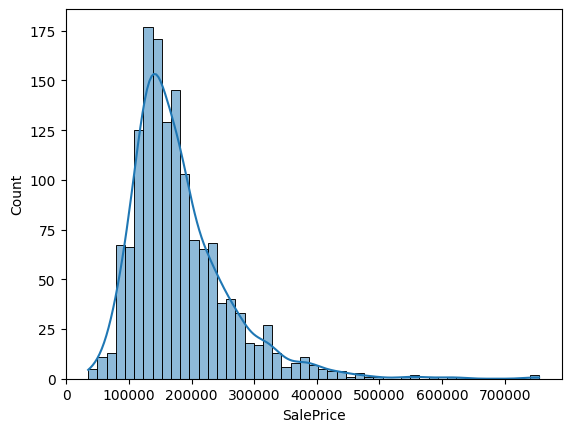

np.float64(1.8828757597682129)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df["SalePrice"],kde=True)
plt.show()
df["SalePrice"].describe()
df["SalePrice"].skew()

The target variable is right-skewed, meaning most houses are moderately priced while a few very expensive houses create a long right tail

In [4]:
numeric_features = []
ordinal_features = []
nominal_features = []

Numeric: Real measurements or counts
Ordinal:Categories with a clear order
Nominal:Categories with no order

In [5]:
numeric_features.extend([
    "LotFrontage",
    "LotArea",
    "GrLivArea",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "GarageArea",
    "GarageCars",
    "YearBuilt",
    "YearRemodAdd",
    "YrSold",
    "MoSold"
])

ordinal_features.extend([
    "OverallQual",
    "OverallCond",
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond"
])

nominal_features.extend([
    "Neighborhood",
    "MSZoning",
    "HouseStyle",
    "BldgType",
    "RoofStyle",
    "Exterior1st",
    "Exterior2nd",
    "Foundation",
    "SaleType",
    "SaleCondition"
])

In [6]:
missing=df.isnull().sum()
missing=missing[missing>0].sort_values(ascending=False)
missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Several features (PoolQC, Fence, FireplaceQu) have missing values because many houses do not have these features

These missing values are meaningful and represent absence rather than data errors

Such features should not be dropped and will require careful handling later

Group 1:Structural Missing
1. PoolQC
2. MiscFeature
3. Alley
4. Fence
5. FireplaceQu
6. GarageType       
7. GarageYrBlt       
8. GarageFinish      
9. GarageQual        
10. GarageCond        
11. BsmtFinType2      
12. BsmtExposure      
13. BsmtFinType1      
14. BsmtCond          
15. BsmtQual          
16. MasVnrType

Group 2: Missing Data
1. LotFrontage
2. MasVnrArea
3. Electrical


In [7]:
qual_map={
    "Po":1,
    "Fa":2,
    "TA":3,
    "Gd":4,
    "Ex":5
}

ordinal_cols=[
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond"
]

for col in ordinal_cols:
    df[col]=df[col].fillna("Po")

In [8]:
df[ordinal_cols].describe()


,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
count,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,4,5,5,4,5,4,5,5,5
top,TA,TA,TA,TA,Ex,TA,Po,TA,TA
freq,906,1282,649,1311,741,735,710,1311,1326


In [9]:
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
GarageType        81
GarageYrBlt       81
GarageFinish      81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
df["LotFrontage"]=df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [11]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")

In [12]:
df["Electrical"]=df["Electrical"].fillna(df["Electrical"].mode()[0])

In [13]:
structural_cat_cols = [
    "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
    "GarageType", "GarageFinish", "GarageQual", "GarageCond",
    "BsmtFinType2", "BsmtExposure", "BsmtFinType1",
    "BsmtCond", "BsmtQual", "MasVnrType"
]

for col in structural_cat_cols:
    df[col] = df[col].fillna("None")
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [14]:
df.isnull().sum().max()

np.int64(0)